# Video 0: Pixels as images, images as pixels

In [42]:
import pandas as pd

df_train = pd.read_csv('C:\\Users\\julia\\Documents\\Code\\wade-datascience\\Q4\\Kaggle\\mnist_train.csv')
df_test = pd.read_csv('C:\\Users\\julia\\Documents\\Code\\wade-datascience\\Q4\\Kaggle\\mnist_test.csv')

In [14]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
import numpy as np

row_data = np.array(df_train.iloc[1,1:])

In [22]:
squared_data = row_data.reshape(28,28)

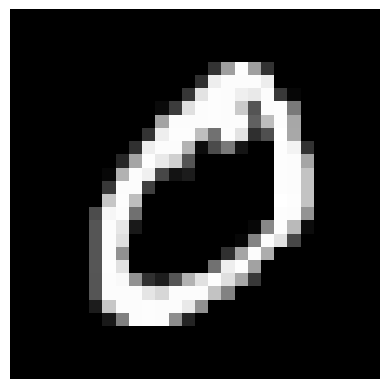

In [24]:
import matplotlib.pyplot as plt

plt.imshow(squared_data, cmap = 'gray')
plt.axis('off')
plt.show()

# Video 1: predicting digits with traditional ML

In [26]:
df_train.shape

(60000, 785)

In [28]:
truncated_df_train = df_train.head(2000)
truncated_df_test = df_test.head(200)

In [ ]:
X = truncated_df_train.iloc[:,1:]
X_test = truncated_df_test.iloc[:,1:]
y = truncated_df_train.iloc[:,0]
y_test = truncated_df_test.iloc[:,0]

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X,y)
model.score(X_test,y_test)

0.91

In [33]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X,y)
model.score(X_test,y_test)

0.94

In [34]:
model.score(X,y)

1.0

In [39]:
from xgboost import XGBClassifier

model = XGBClassifier(colsample_bylevel = 0.5, colsample_bynode = 0.5)
model.fit(X,y)
model.score(X_test,y_test)

0.935

In [40]:
model.score(X,y)

1.0

# Video 2: keras Neural Net

In [43]:
from keras.utils import to_categorical

y_categorized = to_categorical(y, num_classes = 10)
y_test_categorized = to_categorical(y_test, num_classes = 10)

In [44]:
X_scaled = X/255
X_test_scaled = X_test/255

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(
    Dense(128,
        input_shape = (X_scaled.shape[1],),
        activation = 'relu'
    )
)
model.add(Dropout(0.4))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

print(model.summary())

c:\Users\julia\.pyenv\pyenv-win\versions\3.10.4\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,994 (414.04 KB)

 Trainable params: 105,994 (414.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

early_stopping_monitor = EarlyStopping(patience = 20)

model.fit(
    X_scaled,
    y_categorized,
    epochs = 8092,
    validation_split = 0.15,
    callbacks = [early_stopping_monitor]
)

model.evaluate(X_test_scaled, y_test_categorized)

Epoch 1/8092
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2379 - loss: 2.1396 - val_accuracy: 0.6467 - val_loss: 1.1637
Epoch 2/8092
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5964 - loss: 1.2684 - val_accuracy: 0.8433 - val_loss: 0.6245
Epoch 3/8092
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7216 - loss: 0.9132 - val_accuracy: 0.8833 - val_loss: 0.4519
Epoch 4/8092
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.6895 - val_accuracy: 0.9033 - val_loss: 0.3840
Epoch 5/8092
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8299 - loss: 0.6039 - val_accuracy: 0.8867 - val_loss: 0.3454
Epoch 6/8092
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.5244 - val_accuracy: 0.9133 - val_loss: 0.2951
Epoch 7/8092
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.4433 - val_accuracy: 0.9200 - val_loss: 0.2571
Epoch 8/8092
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8942 - loss: 0.3747 - val_accuracy: 0.

[0.15451304614543915, 0.9549999833106995]